## GROUP 3
Erica Adobea Addo-Agyakwah 

Mandy Attah Ocansey 

Phebe Aba Saah-Ayisah 

Monica Afosaah Osei 

Joelle Afi Agbodjan

# FoodHub Data Analysis


### Problem Statement / Business Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import your data

In [2]:
foodhub = pd.read_csv('foodhub_order.csv')

### Do sanity checks on the data

In [3]:
foodhub.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [4]:
foodhub.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


In [7]:
foodhub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 133.6+ KB


In [6]:
#Changing data type
foodhub['order_id']= foodhub['order_id'].astype('str')
foodhub['customer_id']=foodhub['customer_id'].astype('str')

In [10]:
#Checking for duplicates
foodhub.duplicated().sum()

0

In [8]:
foodhub.describe(include=np.number)

,cost_of_the_order,food_preparation_time,delivery_time
count,1898.000000,1898.000000,1898.000000
mean,16.498851,27.371970,24.161749
std,7.483812,4.632481,4.972637
min,4.470000,20.000000,15.000000
25%,12.080000,23.000000,20.000000
50%,14.140000,27.000000,25.000000
75%,22.297500,31.000000,28.000000
max,35.410000,35.000000,33.000000


In [11]:
foodhub.describe(include='object')

,order_id,customer_id,restaurant_name,cuisine_type,day_of_the_week,rating
count,1898,1898,1898,1898,1898,1898
unique,1898,1200,178,14,2,4
top,1477147,52832,Shake Shack,American,Weekend,Not given
freq,1,13,219,584,1351,736


In [12]:
#Checking for null values
foodhub.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [27]:
foodhub['restaurant_name'].unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird To Go',
       'Tamarind Tribeca', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill', 'Big Wong Restaurant',
       'Empanada Mama', 'Pylos', "Lucky'S Famous Burgers", 'Shake Shack',
       'Sushi Of Gari', 'Redfarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers And Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi Of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'Tao', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill', 'Redfarm Broadway',
       'Cafeteria', 'Dumont Burger', "Sarabeth'S East",
       'Hill Country Fried Chicken', 'Bistango', "Jack'S Wife Freda",
       "Mamoun'S Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Brooklyn', 'Nobu Next Door', 'Osteria Morin

The restaurant names that don't look quite right are:

Big Wong Restaurant \x8c_¤¾Ñ¼

Empanada Mama (closed)

Chipotle Mexican Grill $1.99 Delivery

Joe's Shanghai \x8e_À\x8eü£¾÷´

Dirty Bird To Go (archived)


In [17]:
#Creating a dictionary to correct the restaurant names
ammendment={'Big Wong Restaurant \x8c_¤¾Ñ¼':'Big Wong Restaurant', 'Empanada Mama (closed)':'Empanada Mama',\
            'Chipotle Mexican Grill $1.99 Delivery':'Chipotle Mexican Grill',\
            "Joe's Shanghai \x8e_À\x8eü£¾÷´":"Joe's Shanghai",\
            'Dirty Bird To Go (archived)':'Dirty Bird To Go'}

In [18]:
for x, y in ammendment.items():
    foodhub['restaurant_name']= np.where( foodhub['restaurant_name']==x, y, foodhub['restaurant_name'])

In [26]:
foodhub['restaurant_name']= foodhub['restaurant_name'].str.strip().str.title()

## Questions for guidance.
The questions or tasks below are meant to guide you to extract insight for the business. You are encourage to ask more questions.


### **Question 1:** How many orders are not rated?

In [ ]:
# Write the code here.
#Feel free to add more cells.

In [28]:
foodhub[foodhub['rating']== 'Not given']['rating'].count()

736

736 orders are not rated.

## Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 2:** Explore all the variables and provide observations on their distributions. (Choose appropriate plots as you wish)

In [ ]:
# Write the code here.
#Feel free to add more cells.


In [29]:
#total number of orders
foodhub['order_id'].nunique()

1898

In [30]:
#number of unique customers
foodhub['customer_id'].nunique()


1200

In [31]:
#number of restaurants
foodhub['restaurant_name'].nunique()

177

In [32]:
#number of cuisine types
foodhub['cuisine_type'].value_counts()

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64

In [33]:
#proportion of cuisine types
round(foodhub['cuisine_type'].value_counts(normalize=True)*100, 2)

cuisine_type
American          30.77
Japanese          24.76
Italian           15.70
Chinese           11.33
Mexican            4.06
Indian             3.85
Middle Eastern     2.58
Mediterranean      2.42
Thai               1.00
French             0.95
Southern           0.90
Korean             0.68
Spanish            0.63
Vietnamese         0.37
Name: proportion, dtype: float64

## Univariate Plots

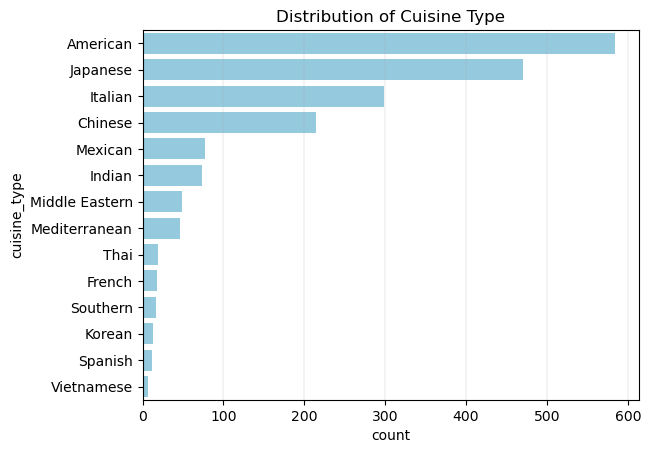

In [34]:
cuisine_order= foodhub['cuisine_type'].value_counts().index

sns.countplot(y=foodhub['cuisine_type'], color='skyblue', order=cuisine_order)
plt.title('Distribution of Cuisine Type')
plt.grid(axis= 'x', linewidth= 0.2)
plt.show()

* The highest occurring cuisine type was the American cuisine with a count of 584 which is 30.77% of the total
* The least occurring cuisine type was the Vietnamese cuisine with a count of 7 which is 0.37% of the total

In [35]:
foodhub['cost_of_the_order'].describe().round(2)

count    1898.00
mean       16.50
std         7.48
min         4.47
25%        12.08
50%        14.14
75%        22.30
max        35.41
Name: cost_of_the_order, dtype: float64

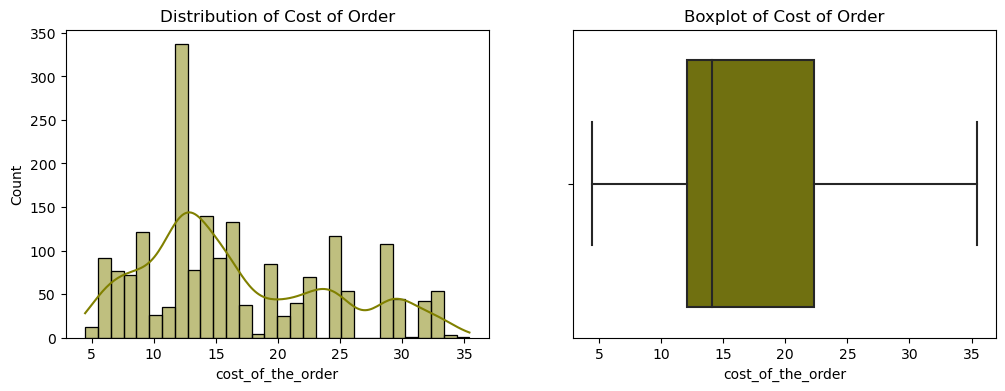

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plotting histogram on the first axis
sns.histplot(x= foodhub['cost_of_the_order'], ax=ax[0], color= 'olive', bins=30, kde= True)
ax[0].set_title('Distribution of Cost of Order')

# Plotting boxplot on the second axis
sns.boxplot(x= foodhub['cost_of_the_order'], ax=ax[1], color='olive')
ax[1].set_title('Boxplot of Cost of Order')

plt.show()

* From the plots above, the highest recurring cost of order is about 12 dollars
* The median value is about 14 dollars
* The distribution is skewed to the right

In [37]:
foodhub['day_of_the_week'].value_counts()

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

In [38]:
foodhub['day_of_the_week'].value_counts(normalize=True)*100

day_of_the_week
Weekend    71.18019
Weekday    28.81981
Name: proportion, dtype: float64

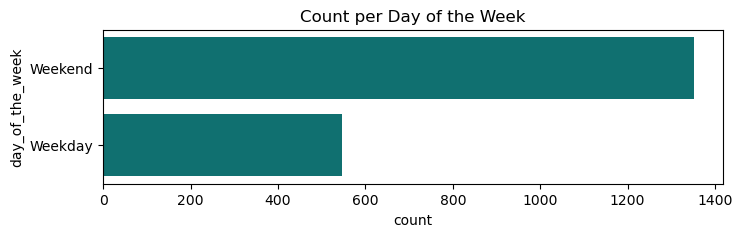

In [45]:
plt.figure(figsize=(8,2))
sns.countplot(y=foodhub['day_of_the_week'], color='teal')
plt.title('Count per Day of the Week')
plt.show()

* The weekend has 71% of the orders, constituting more orders than the weekday which has 29% of the total orders.

In [40]:
rorder= foodhub['rating'].value_counts().index
foodhub['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [41]:
foodhub['rating'].value_counts(normalize=True)*100

rating
Not given    38.777661
5            30.979979
4            20.337197
3             9.905163
Name: proportion, dtype: float64

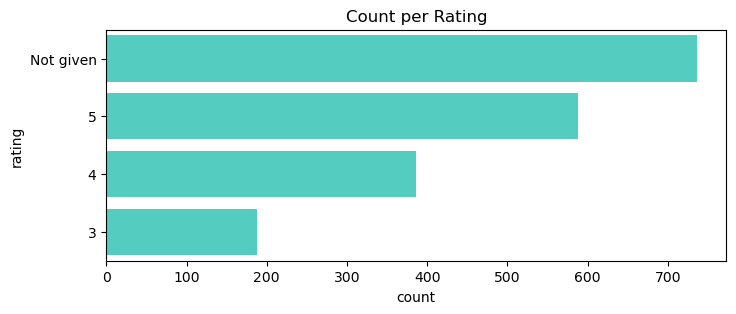

In [46]:
plt.figure(figsize= (8,3))
sns.countplot(y=foodhub['rating'], color='turquoise', order=rorder)
plt.title('Count per Rating')
plt.show()

* 38.8% of the ratings were not given

In [43]:
foodhub['food_preparation_time'].describe().round(2)

count    1898.00
mean       27.37
std         4.63
min        20.00
25%        23.00
50%        27.00
75%        31.00
max        35.00
Name: food_preparation_time, dtype: float64

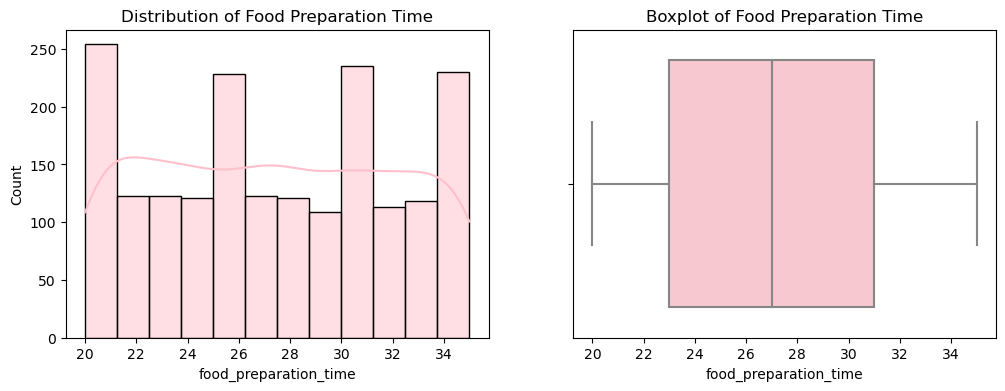

In [44]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.histplot(x= foodhub['food_preparation_time'], ax= ax[0], color='pink', kde='True')
ax[0].set_title('Distribution of Food Preparation Time')

sns.boxplot(x=foodhub['food_preparation_time'], ax=ax[1], color='pink')
ax[1].set_title('Boxplot of Food Preparation Time')

plt.show()

* The highest recurring food preparation time ranges from 20 to 21 minutes.
* The median is 27 minutes.

In [47]:
foodhub['delivery_time'].describe().round(2)

count    1898.00
mean       24.16
std         4.97
min        15.00
25%        20.00
50%        25.00
75%        28.00
max        33.00
Name: delivery_time, dtype: float64

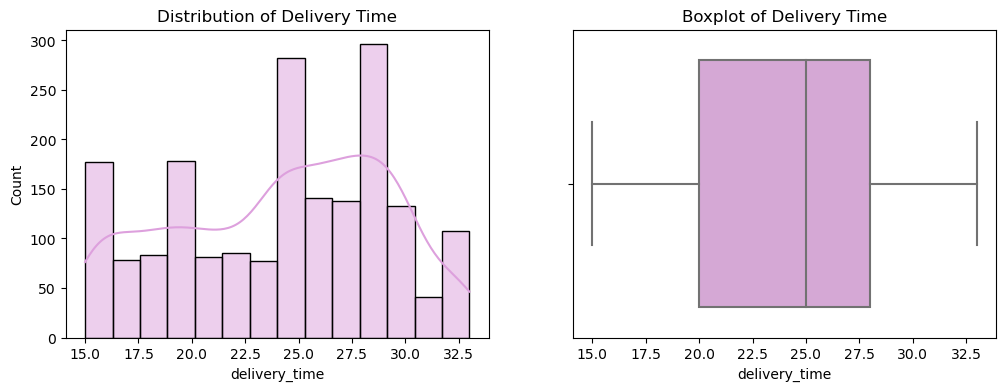

In [48]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.histplot(x=foodhub['delivery_time'], ax= ax[0], kde=True, color='plum')
ax[0].set_title('Distribution of Delivery Time')

sns.boxplot(x=foodhub['delivery_time'], ax=ax[1], color='plum')
ax[1].set_title('Boxplot of Delivery Time')

plt.show()

* The highest recurring deliver time ranges from 27.5 to 30 minutes.
* The median is 25 minutes.

### **Question 3**: Which are the top 5 restaurants in terms of the number of orders received?

In [50]:
# Write the code here
# Feel free to add more cells
top =foodhub.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False)
top[:5]

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

The top 5 restaurants in terms of order number are:
* Shake Shack with 219 orders
* The Meatball Shop with 132 orders
* Blue Ribbon Sushi with 119 orders
* Blue Ribbon Fried Chicken with 96 orders
* Parm with 68 orders

### **Question 4**: Which is the most popular cuisine on weekends?

In [21]:
# Write the code here
# Feel free to add more cells

cuisinedf = foodhub.groupby(['day_of_the_week', 'cuisine_type'])[['cuisine_type']].count()

cuisinedf.rename(columns={'cuisine_type': 'no_of_orders'}, inplace= True)

cuisinedf.sort_values(by=['day_of_the_week','no_of_orders'], ascending=False, inplace=True)
cuisinedf.reset_index([0,1], inplace=True)

cuisinedf.iloc[[0]]

,day_of_the_week,cuisine_type,no_of_orders
0,Weekend,American,415


The most popular cuisine on weekends in the American cuisine with 415 orders

### **Question 5**: What percentage of the orders cost more than 20 dollars?

In [54]:
# Write the code here
# Feel free to add more cells

round((foodhub[foodhub['cost_of_the_order']>20]['cost_of_the_order']\
            .count()/foodhub['cost_of_the_order']\
            .value_counts().sum()*100), 2)


29.24

29.24% of the orders cost more than 20 dollars.

### **Question 6**: What is the mean order delivery time?

In [55]:
# Write the code here
# Feel free to add more cells

foodhub['delivery_time'].mean().round(2)

24.16

The mean delivery time is 24.16 minutes.

### **Question 7:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
# Feel free to add more cells

In [56]:
customers = foodhub.groupby('customer_id')[['order_id']].count().sort_values(by='order_id',ascending=False)

customers.rename(columns={'order_id':'no_of_orders'}, inplace=True)

customers[0:3]

,no_of_orders
customer_id,
52832,13
47440,10
83287,9


The 3 most frequent customers are 52832, 47440 and 83287 with 13, 10 and 9 orders respectively.

## Bivariate/Multivariate Analysis

### **Question 8**: Perform a bivariate/multivariate analysis to explore relationships between the important variables in the dataset.


In [ ]:
# Write the code here
# Feel free to add more cells

In [10]:
#Creating a new column with total time for food to arrive from when an order was made
foodhub['total_time']= foodhub['food_preparation_time']+foodhub['delivery_time']

In [11]:
#Creating new column with rating as float
foodhub['new_rate'] = foodhub['rating']

foodhub['new_rate']= np.where(foodhub['new_rate']=='Not given', np.nan, foodhub['new_rate'])

foodhub['new_rate']=foodhub['new_rate'].astype('float64')

In [12]:
foodhub.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,new_rate,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,NaN,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,NaN,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5.0,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3.0,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4.0,49


In [13]:
#creating dataframes with numerical variables by cuisine type
newdf1=foodhub.groupby('cuisine_type')[['restaurant_name']].nunique().reset_index()

newdf2=foodhub.groupby('cuisine_type')[['new_rate']].mean().round(2).reset_index()

newdf3= foodhub.groupby('cuisine_type')[['order_id']].count().reset_index()
newdf3['avg_number_of_orders']= round(newdf3['order_id']/newdf1['restaurant_name'], 0)

newdf4= foodhub.groupby('cuisine_type')[['cost_of_the_order']].mean().round(2).reset_index()

newdf5= foodhub.groupby('cuisine_type')[['total_time']].mean().round(2).reset_index()

In [14]:
#Counting the number of ratings that were not given per cuisine type
not_given=foodhub[foodhub['rating']=='Not given']
cuisine_nan=not_given.groupby('cuisine_type')[['rating']].count().reset_index()


In [15]:
#Merging the newly created dataframes
newdf= newdf1.merge(newdf2,on='cuisine_type', how='left')\
            .merge(newdf3, on='cuisine_type', how='left')\
            .merge(newdf4, on='cuisine_type', how='left')\
            .merge(newdf5, on='cuisine_type', how='left')\
            .merge(cuisine_nan, on='cuisine_type', how='left')

In [16]:
newdf.rename(columns={'new_rate':'avg_rating', 'restaurant_name':'number_of_restaurants',\
                      'order_id':'number_of_orders', 'cost_of_the_order':'avg_cost_of_orders',\
                      'total_time':'avg_completion_time', 'rating':'missing_ratings'}, inplace=True)
newdf

,cuisine_type,number_of_restaurants,avg_rating,number_of_orders,avg_number_of_orders,avg_cost_of_orders,avg_completion_time,missing_ratings
0,American,41,4.30,584,14.0,16.32,51.63,216
1,Chinese,16,4.34,215,13.0,16.31,51.37,82
2,French,3,4.30,18,6.0,19.79,52.22,8
3,Indian,14,4.54,73,5.0,16.92,51.19,23
4,Italian,31,4.36,298,10.0,16.42,52.05,126
5,Japanese,29,4.37,470,16.0,16.30,51.64,197
6,Korean,5,4.11,13,3.0,14.00,46.38,4
7,Mediterranean,5,4.22,46,9.0,15.47,50.59,14
8,Mexican,11,4.42,77,7.0,16.93,51.12,29
9,Middle Eastern,7,4.24,49,7.0,18.82,50.76,15


In [22]:
#Calculating average rating for cuisine type per day of the week
cuisinedf1 = foodhub.groupby(['day_of_the_week', 'cuisine_type'])[['new_rate']].mean().round(2)
cuisinedf1.reset_index([0,1], inplace=True)

In [23]:
#Counting ratings that were not given for cuisine types per day of the week
cuisinedf2=not_given.groupby(['day_of_the_week','cuisine_type'])[['rating']].count()
cuisinedf2.reset_index([0,1], inplace=True)

In [24]:
finalcuisine= cuisinedf.merge(cuisinedf1, on=['cuisine_type', 'day_of_the_week'], how='left')\
                       .merge(cuisinedf2, on=['cuisine_type', 'day_of_the_week'], how='left')
finalcuisine.rename(columns={'new_rate':'avg_rating', 'rating':'missing_ratings'}, inplace=True)

In [67]:
finalcuisine

,day_of_the_week,cuisine_type,no_of_orders,avg_rating,missing_ratings
0,Weekend,American,415,4.32,158.0
1,Weekend,Japanese,335,4.38,136.0
2,Weekend,Italian,207,4.34,97.0
3,Weekend,Chinese,163,4.36,56.0
4,Weekend,Mexican,53,4.44,21.0
5,Weekend,Indian,49,4.58,13.0
6,Weekend,Mediterranean,32,4.33,11.0
7,Weekend,Middle Eastern,32,4.05,13.0
8,Weekend,Thai,15,4.75,7.0
9,Weekend,French,13,4.25,5.0


## Bivariate and Multivariate plots

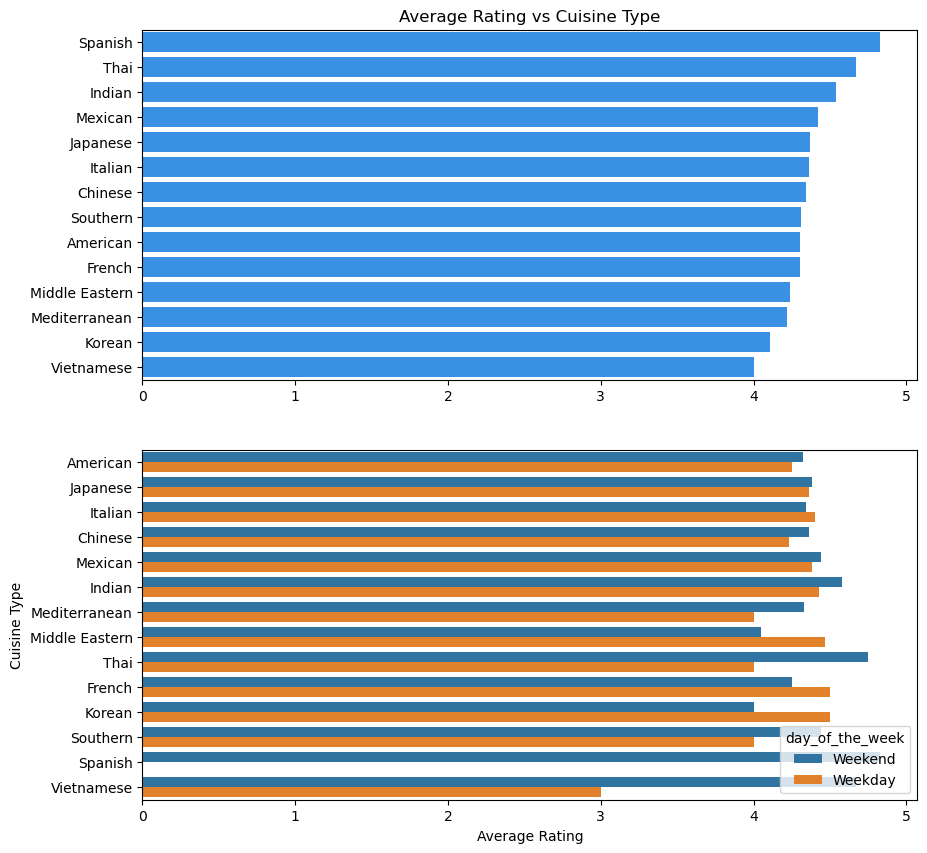

In [25]:
newdf.sort_values(by='avg_rating', ascending=False, inplace=True)

fig,ax=plt.subplots(2,1, figsize=(10,10))
sns.barplot(x='avg_rating',y='cuisine_type',data = newdf, color ='dodgerblue', ax=ax[0])

ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('Average Rating vs Cuisine Type')


sns.barplot(x=finalcuisine['avg_rating'],y=finalcuisine['cuisine_type'], hue=finalcuisine['day_of_the_week'], ax=ax[1])

ax[1].set_xlabel('Average Rating')
ax[1].set_ylabel('Cuisine Type')


plt.show()

* Spanish and Thai cuisines are the highest with average ratings of 4.83 and 4.67 respectively.
* Korean and Vietnamese cuisines are the lowest ratings with average ratings of 4.11 and 4.00 respectively.
* The Spanish cuisine's overall average ratings are equivalent to its average weekend rating since there was no rating given on a weekday.
* The Thai cuisine's ratings on the weekend is greater than its ratings on the weekdays.
* The Korean cuisine's ratings were tied with Southern cuisine at the highest for weekday but had the lowest rating for the weekend.
* The Vietnamese cuisine's rating was the third highest with an average of 4.67 on the weekend however, it had the lowest rating (3.00) for weekdays which decreased its overall rating and made it the lowest.


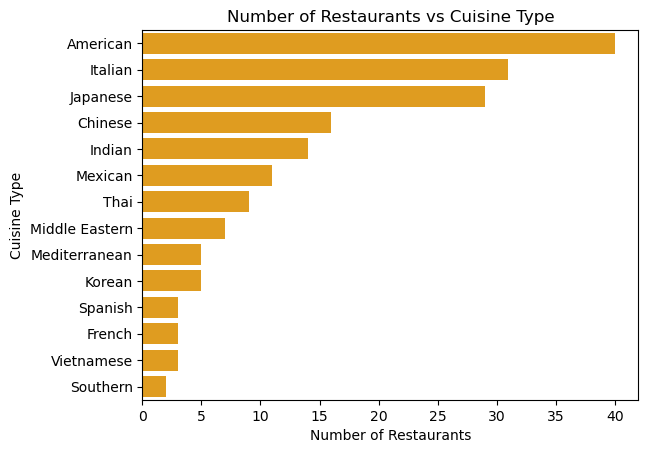

In [70]:
newdf.sort_values(by='number_of_restaurants', ascending=False, inplace=True)
sns.barplot(x='number_of_restaurants',y='cuisine_type',data = newdf, color ='orange')
plt.title('Number of Restaurants vs Cuisine Type')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Type')
plt.show()

* American cuisine has the highest number of restaurants whilst Southern cuisine has the lowest number of restaurants representing



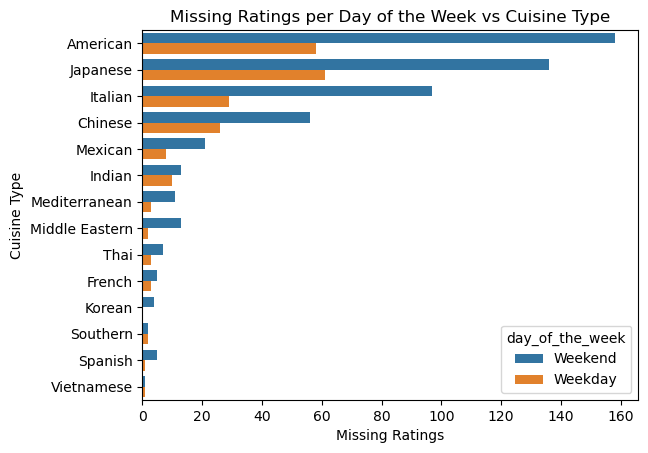

In [71]:
sns.barplot(x=finalcuisine['missing_ratings'],y=finalcuisine['cuisine_type'], hue=finalcuisine['day_of_the_week'])
plt.title('Missing Ratings per Day of the Week vs Cuisine Type')
plt.xlabel('Missing Ratings')
plt.ylabel('Cuisine Type')
plt.show()

* Generally, the weekend has a higher number of missing rating values as compared to the weekday.
* American cuisine has the highest number of missing ratings of 216.

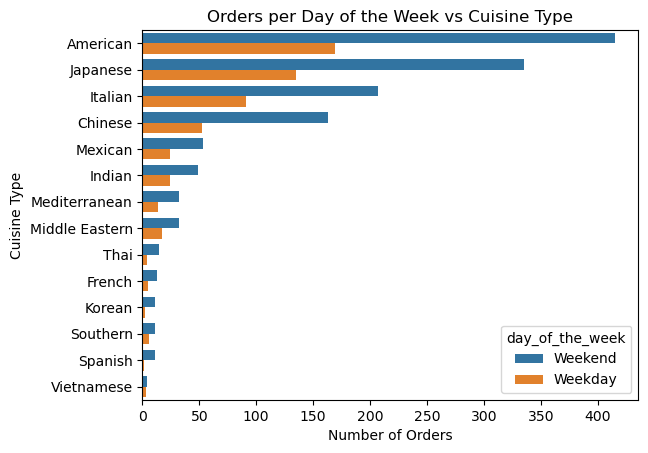

In [72]:
sns.barplot(x=cuisinedf['no_of_orders'],y=cuisinedf['cuisine_type'], hue=cuisinedf['day_of_the_week'])
plt.title('Orders per Day of the Week vs Cuisine Type')
plt.xlabel('Number of Orders')
plt.ylabel('Cuisine Type')
plt.show()

* The number of orders for the weekend were higher than the orders for the weekday for all the cuisine types
* Comparing this graph to the ratings vs the cuisine types, it can be seen thqat though Spanish and Thai cuisine's had the highest ratings, they had relatively low number of orders. 
* There is a likelihood that their average ratings were high because they had high ratings and small number of orders or that many of the ratings for the orders were not given for the higher rankings of number of orders.
* From this graph, it can be seen that there is not much difference between the ranking of the cuisine types in comparison to number of restaurants and number of orders.

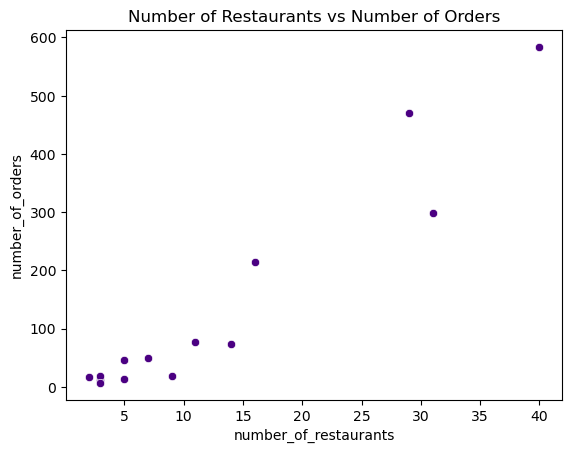

In [74]:
sns.scatterplot(x='number_of_restaurants',y='number_of_orders',data = newdf, color ='indigo')
plt.title('Number of Restaurants vs Number of Orders')

plt.show()

This graph shows a positive correlation between number of restaurants and the number of orders

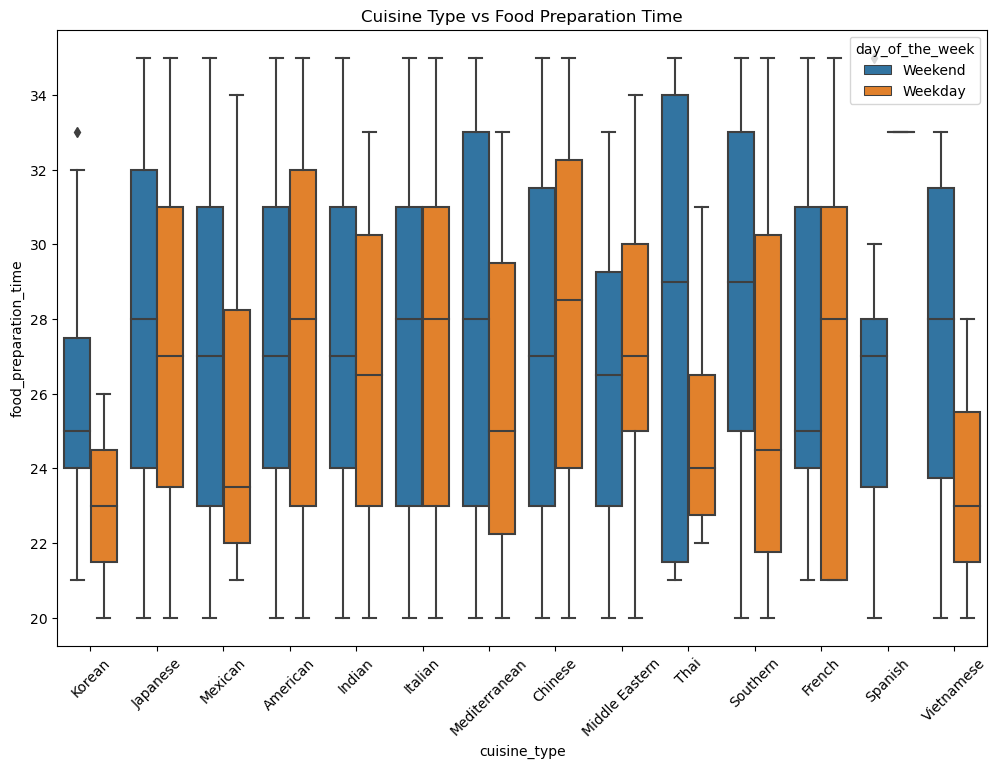

In [75]:
plt.figure(figsize=(12,8))
sns.boxplot(x='cuisine_type',y='food_preparation_time', data=foodhub, hue='day_of_the_week')
plt.title('Cuisine Type vs Food Preparation Time')
plt.xticks(rotation=45)
plt.show()

The Korean Cuisine has the fastest food preparation time
Italian cuisine has the most stable food preparation time on both weekend and weekday
About 49% of the cuisine types have similar food preparation times

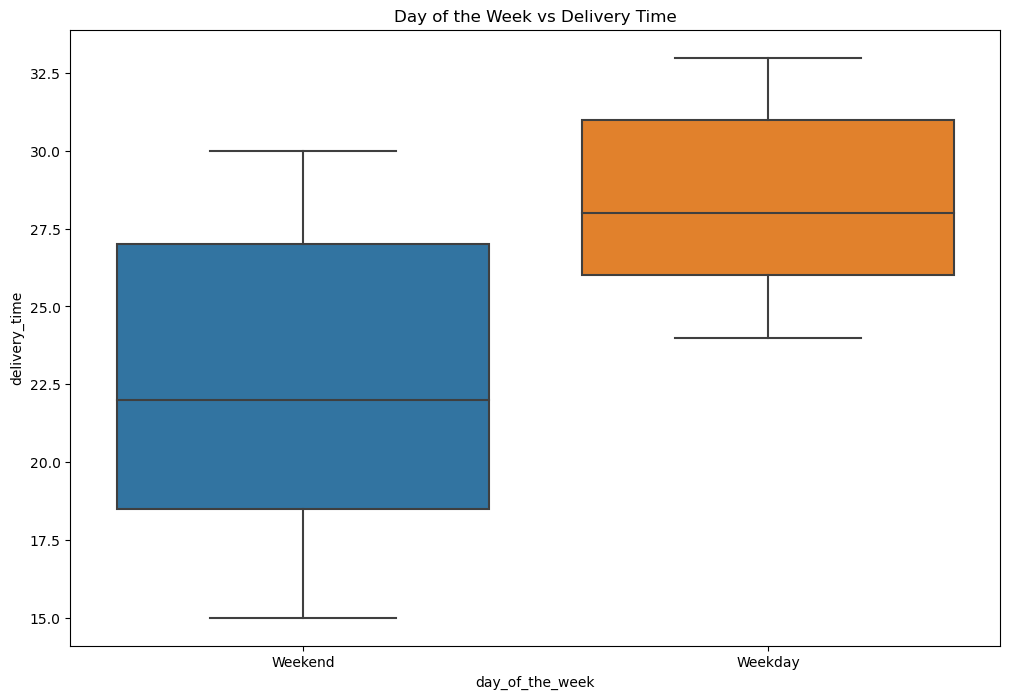

In [76]:
plt.figure(figsize=(12,8))
sns.boxplot(x='day_of_the_week',y='delivery_time', data=foodhub)
plt.title('Day of the Week vs Delivery Time')
plt.show()

The average delivery time during the weekend spans a longer range, however the weekend bears the least time as compared to both the max and minimum delivery time of the weekday

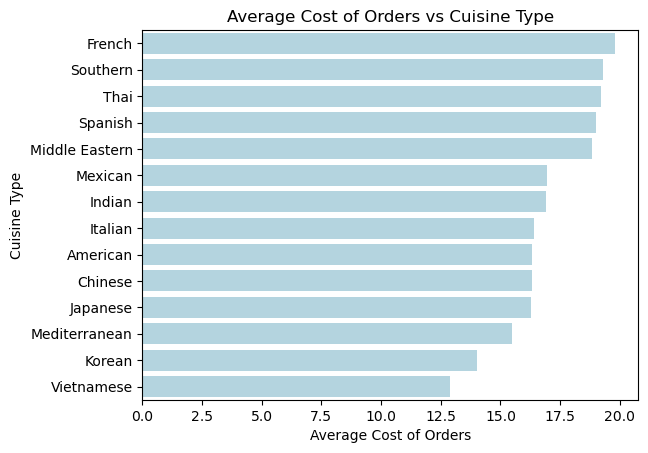

In [77]:
newdf.sort_values(by='avg_cost_of_orders', ascending=False, inplace=True)
sns.barplot(x=newdf['avg_cost_of_orders'],y=newdf['cuisine_type'], color='lightblue')
plt.title('Average Cost of Orders vs Cuisine Type')
plt.xlabel('Average Cost of Orders')
plt.ylabel('Cuisine Type')
plt.show()

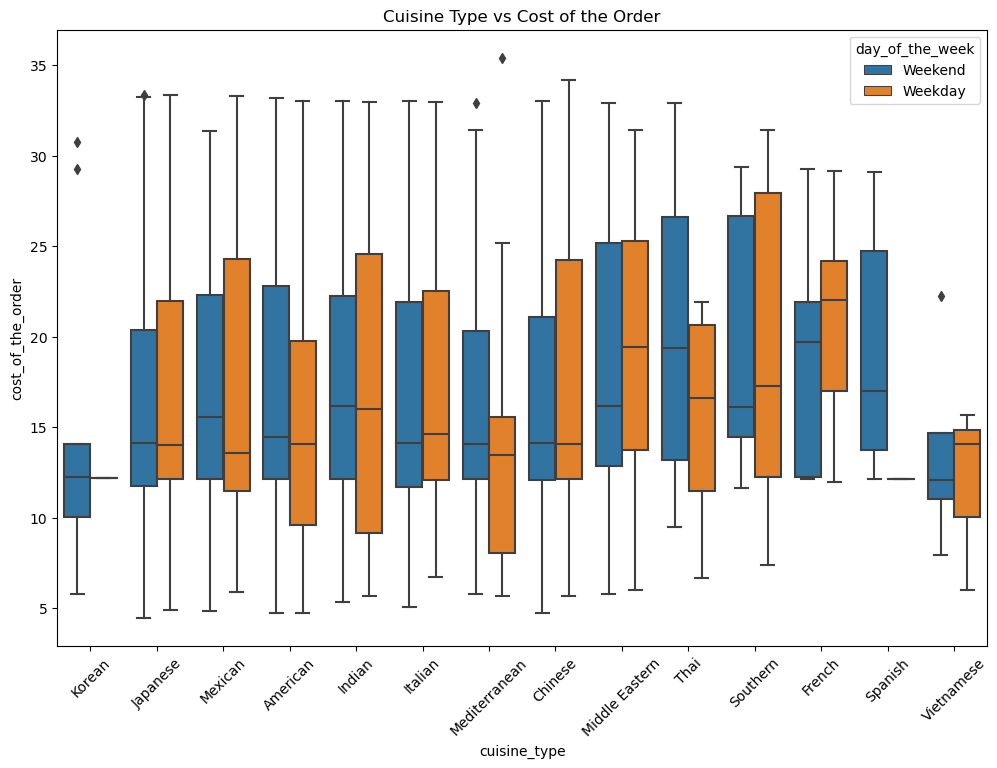

In [78]:
plt.figure(figsize=(12,8))
sns.boxplot(x='cuisine_type',y='cost_of_the_order', data=foodhub, hue='day_of_the_week',)
plt.title('Cuisine Type vs Cost of the Order')

plt.xticks(rotation=45)

plt.show()

The cheapest cuisine types are Korean and Vietnamese cuisines whilst the highest are French and Southern cuisines. 

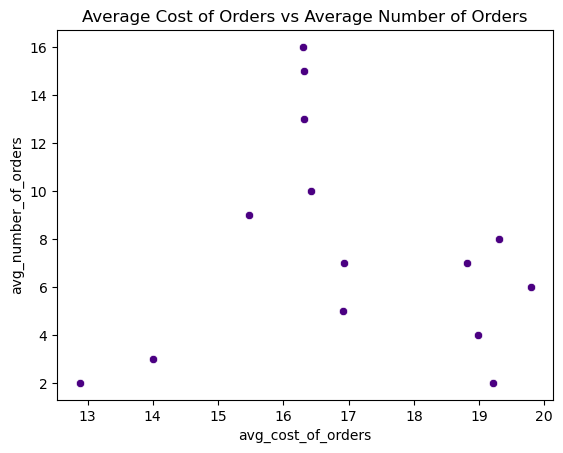

In [79]:
sns.scatterplot(x='avg_cost_of_orders',y='avg_number_of_orders',data = newdf, color ='indigo')
plt.title('Average Cost of Orders vs Average Number of Orders')

plt.show()

From the graphs above, it can be seen that the cuisine's with the highest cost of order (French and Southern) have low number of orders, however, the cuisines with the lowest cost of order (Korean and Vietnamese), do not have high number of orders. Rather, the cuisine types in the middle belt of the cost of orders have high number of orders. 

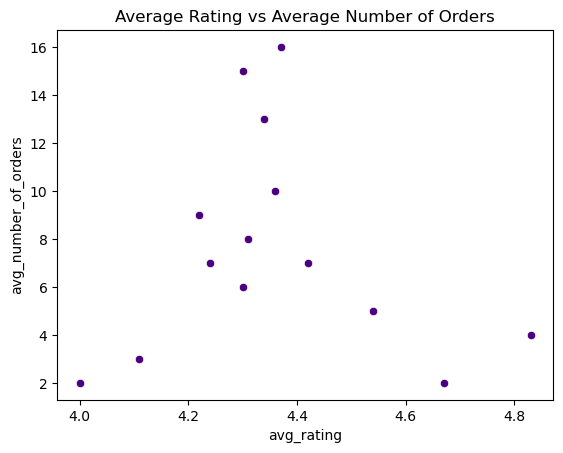

In [80]:
sns.scatterplot(x='avg_rating',y='avg_number_of_orders',data = newdf, color ='indigo')
plt.title('Average Rating vs Average Number of Orders')

plt.show()

From this graph, it is seen that the ratings are condensed between 4.2 and 4.6 however there is no relationship seen between the rating and the number of orders

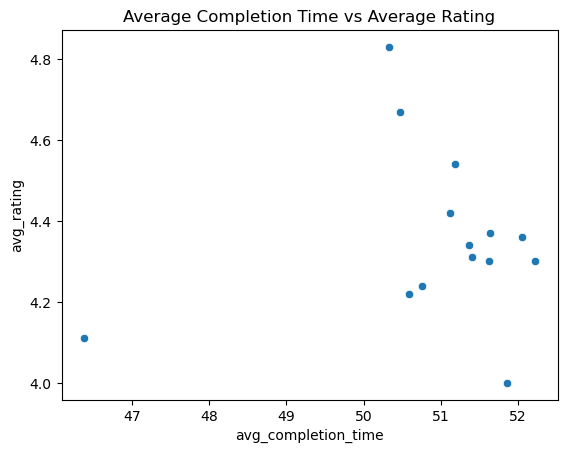

In [81]:
sns.scatterplot(x='avg_completion_time',y='avg_rating',data = newdf)
plt.title('Average Completion Time vs Average Rating')

plt.show()

With the exception of one, the average completion time is between 50 and 53 so there is not a relationship between that and the average rating.

### **Question 9:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# Write the code here
# Feel free to add more cells

In [6]:
count= foodhub.groupby('restaurant_name')['new_rate'].count()
more_than_fifty= count[count>50].index
restaurants= foodhub[foodhub['restaurant_name'].isin(more_than_fifty)]
restaurants

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,new_rate
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3.0
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21,NaN
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17,5.0
15,1477414,66222,Shake Shack,American,16.20,Weekend,5,33,25,5.0
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26,4.0
...,...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,Not given,26,30,NaN
1888,1477353,106324,The Meatball Shop,Italian,16.20,Weekend,5,21,26,5.0
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28,NaN
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,NaN


In [7]:
mean_ratings= restaurants.groupby('restaurant_name')['new_rate'].mean()
selected_restaurants= mean_ratings[mean_ratings>4]
selected_restaurants

restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: new_rate, dtype: float64

The restaurants fulfilling the criteria to get the promotional offer are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack and The Meatball Shop.

### **Question 10:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
# Write the code here
# Feel free to add more cells

In [32]:
total_revenue=0 
for x in foodhub['cost_of_the_order']: 
    if x>20: 
        revenue=x*0.25
    elif x>5: 
        revenue=x*0.15 
    else: 
        revenue=0
    total_revenue+=revenue
total_revenue

6166.302999999994

The net revenue of the company across all orders is 6,166.30 dollars

### **Question 11:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
# Write the code here
# Feel free to add more cells

In [15]:
percent_more = (len(foodhub.loc[foodhub['total_time']>60])/ len(foodhub))*100
percent_more

10.537407797681771

Approximately 10.54% of orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 12:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [11]:
mean_weekend = foodhub[foodhub['day_of_the_week'].isin(['Weekend'])]
x = mean_weekend['delivery_time'].mean()
x

22.4700222057735

In [12]:
mean_weekday = foodhub[foodhub['day_of_the_week'].isin(['Weekday'])]
y = mean_weekday['delivery_time'].mean()
y

28.340036563071298

In [13]:
difference = y-x
difference

5.870014357297798

The mean delivery time on weekends is 22.47 minutes whilst the mean delivery time on weekdays is 28.34 minutes. This means that delivery is faster on weekends. The difference between the delivery times on weekdays and weekends is 5.87 minutes.

## Conclusion and Recommendations

### Conclusions:
* 72% of orders had an average rate of 4.36 however, 38% of orders were unrated.  
* The popularity of cuisines remains consistent regardless of the day of the week, though demands on weekends are higher.
* Preparation time for orders is relatively consistent, but delivery time varies more significantly this may be due day of the week or other factors such as distance or traffic.
* There is a relationship beween the number of orders received and the number of restaurants per cuisine type. 

### Recommendations:

* The restaurants should encourage their customers to rate them for an accurate depiction of their food and service.

* Discounts/promotions can be given to increase the patronage on weekdays.

* The restaurants can partner with companies to provide food during weekdays to increase sales.

* Encourage advertisement for all restaurants especially those with low amount of orders and low number of restaurants.

---